#### 1. Imports & load v2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline

df = pd.read_csv("../data/processed/crop_risk_insurance_v2.csv")
print("Shape:", df.shape)
print(df.info())
print("\nMissing values:", df.isnull().sum().sum())

Shape: (18000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              18000 non-null  object 
 1   crop                 18000 non-null  object 
 2   season_year          18000 non-null  int64  
 3   rainfall_mm          18000 non-null  float64
 4   avg_temp_c           18000 non-null  float64
 5   heat_stress_days     18000 non-null  int64  
 6   ndvi_peak            18000 non-null  float64
 7   soil_ph              18000 non-null  float64
 8   soc_percent          18000 non-null  float64
 9   fertilizer_n_kg_ha   18000 non-null  float64
 10  pest_disease_level   18000 non-null  int64  
 11  irrigated            18000 non-null  int64  
 12  actual_yield_t_ha    18000 non-null  float64
 13  expected_yield_t_ha  18000 non-null  float64
 14  yield_loss_pct       18000 non-null  float64
 15  risk_class       

#### Target summaries

In [3]:
print("\nRisk class distribution:")
print(df['risk_class'].value_counts(normalize=True).round(3) * 100)


Risk class distribution:
risk_class
High      55.3
Low       38.3
Medium     6.4
Name: proportion, dtype: float64


In [4]:
print("\nPayout summary:")
print(df['payout_usd_per_ha'].describe().round(1))


Payout summary:
count    18000.0
mean       290.0
std        249.3
min          0.0
25%          0.0
50%        342.5
75%        552.3
max        596.7
Name: payout_usd_per_ha, dtype: float64


In [5]:
print("\nYield loss % summary:")
print(df['yield_loss_pct'].describe().round(3))


Yield loss % summary:
count    18000.000
mean         0.483
std          0.415
min          0.000
25%          0.000
50%          0.571
75%          0.920
max          0.994
Name: yield_loss_pct, dtype: float64


#### Visuals

C:\Users\Eldu\AppData\Local\Temp\ipykernel_14588\1533836616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risk_class', palette='Set2', ax=axes[0,0])
C:\Users\Eldu\AppData\Local\Temp\ipykernel_14588\1533836616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='country', y='payout_usd_per_ha', palette='viridis', ax=axes[1,0])


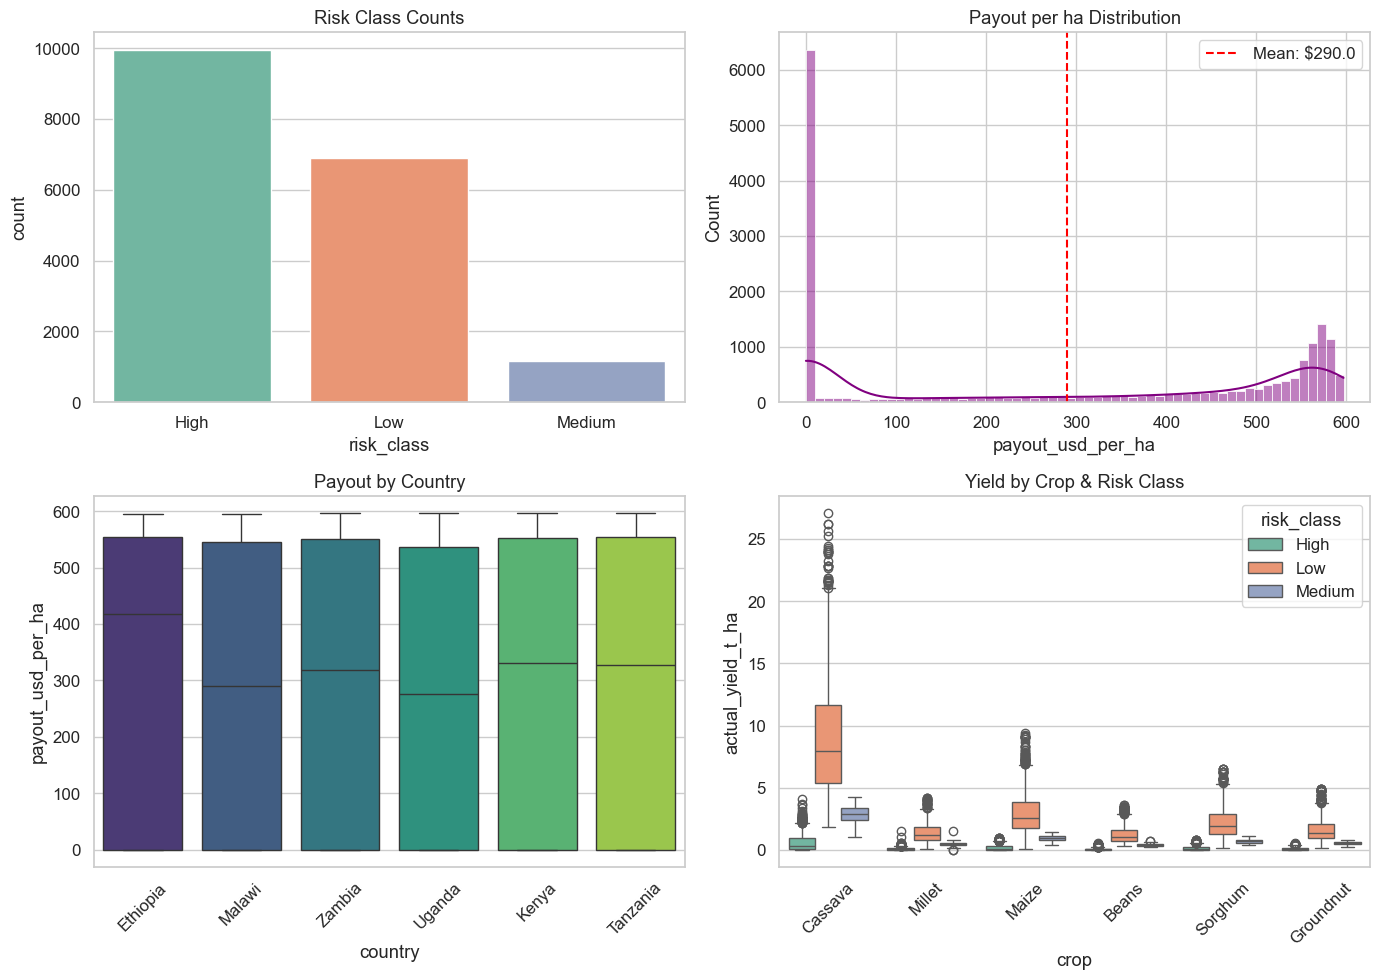

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='risk_class', palette='Set2', ax=axes[0,0])
axes[0,0].set_title('Risk Class Counts')

sns.histplot(df['payout_usd_per_ha'], bins=60, kde=True, color='purple', ax=axes[0,1])
axes[0,1].set_title('Payout per ha Distribution')
axes[0,1].axvline(df['payout_usd_per_ha'].mean(), color='red', linestyle='--', label=f'Mean: ${df["payout_usd_per_ha"].mean():.1f}')
axes[0,1].legend()

sns.boxplot(data=df, x='country', y='payout_usd_per_ha', palette='viridis', ax=axes[1,0])
axes[1,0].set_title('Payout by Country')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df, x='crop', y='actual_yield_t_ha', hue='risk_class', palette='Set2', ax=axes[1,1])
axes[1,1].set_title('Yield by Crop & Risk Class')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Key correlations

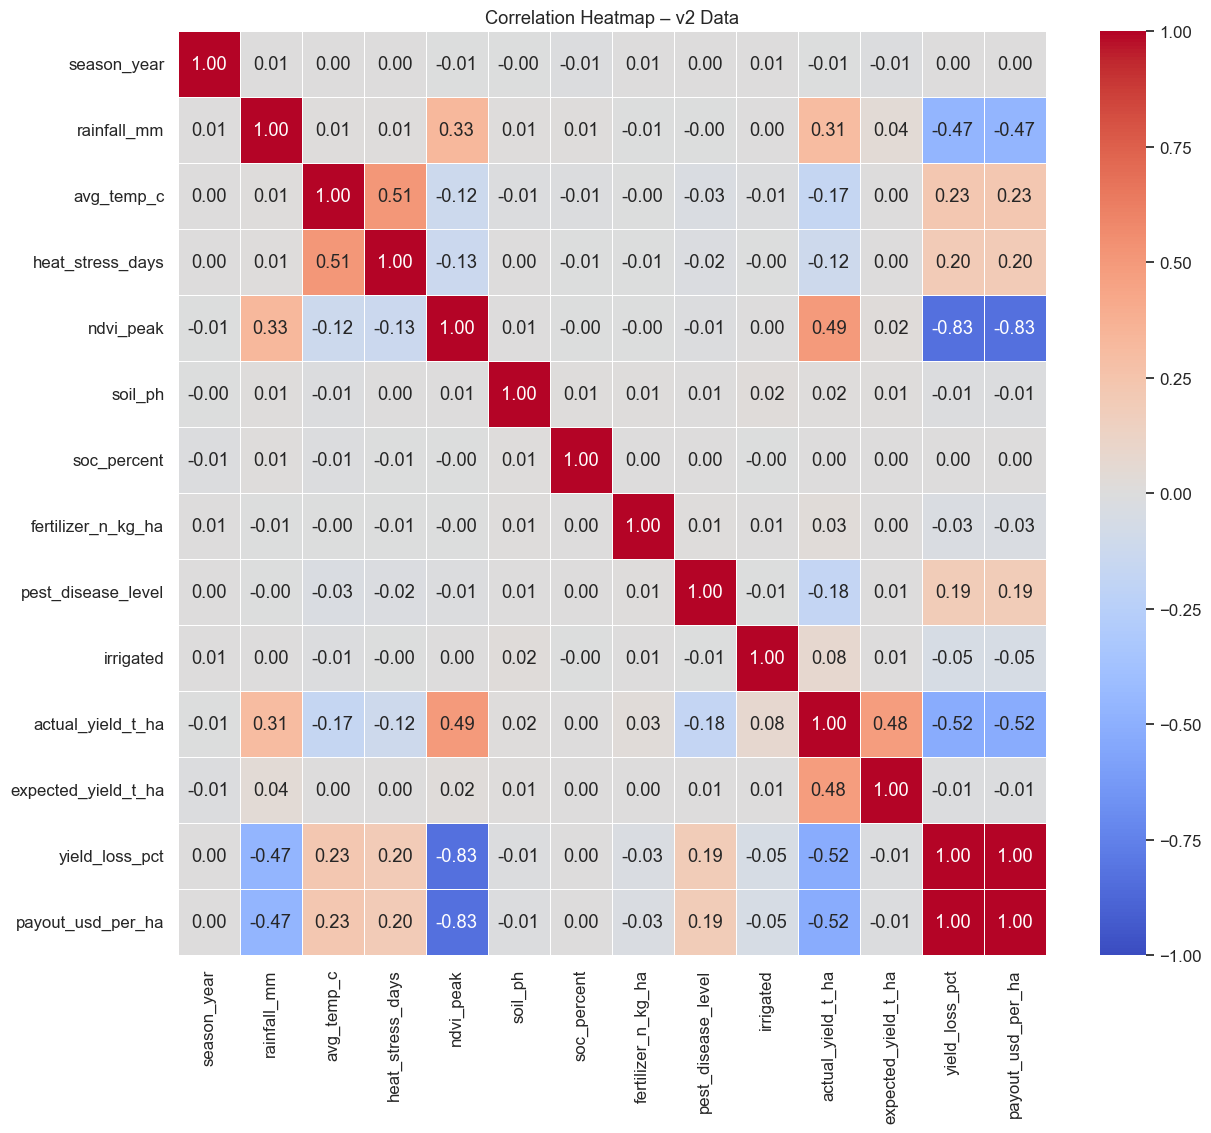

In [7]:
numeric = df.select_dtypes(include=np.number)
corr = numeric.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap – v2 Data')
plt.show()

In [8]:
print("Top correlations with payout_usd_per_ha:")
print(corr['payout_usd_per_ha'].sort_values(ascending=False).head(12).round(3))

Top correlations with payout_usd_per_ha:
yield_loss_pct         1.000
payout_usd_per_ha      1.000
avg_temp_c             0.231
heat_stress_days       0.196
pest_disease_level     0.194
season_year            0.005
soc_percent            0.002
soil_ph               -0.009
expected_yield_t_ha   -0.012
fertilizer_n_kg_ha    -0.030
irrigated             -0.050
rainfall_mm           -0.467
Name: payout_usd_per_ha, dtype: float64


In [9]:
print("\nTop correlations with yield_loss_pct:")
print(corr['yield_loss_pct'].sort_values(ascending=False).head(12).round(3))


Top correlations with yield_loss_pct:
payout_usd_per_ha      1.000
yield_loss_pct         1.000
avg_temp_c             0.231
heat_stress_days       0.196
pest_disease_level     0.194
season_year            0.005
soc_percent            0.002
soil_ph               -0.009
expected_yield_t_ha   -0.012
fertilizer_n_kg_ha    -0.030
irrigated             -0.050
rainfall_mm           -0.467
Name: yield_loss_pct, dtype: float64


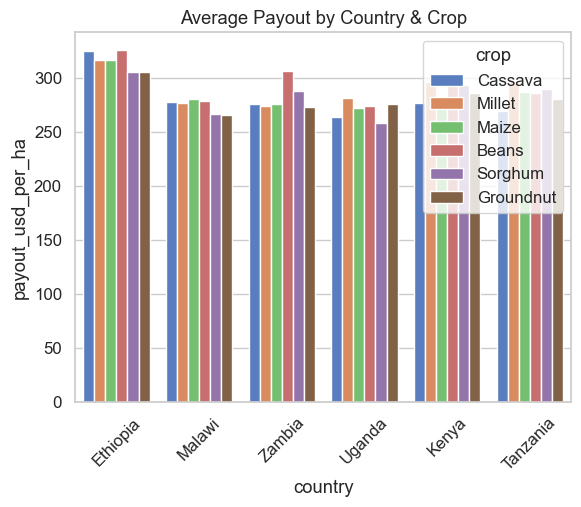

In [10]:
sns.barplot(data=df, x='country', y='payout_usd_per_ha', hue='crop', errorbar=None)
plt.xticks(rotation=45)
plt.title('Average Payout by Country & Crop')
plt.show()